In [1]:
import os

data_dir = "/kaggle/input/utkface-new" 
files = os.listdir(data_dir)  


In [2]:
import os

data_dir = "/kaggle/input/utkface-new"

for folder in ["UTKFace", "utkface_aligned_cropped", "crop_part1"]:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):  
        files = os.listdir(folder_path)[:5]  
        print(f"📂 {folder} First 5 files in the folder: {files}")




📂 UTKFace First 5 files in the folder: ['26_0_2_20170104023102422.jpg.chip.jpg', '22_1_1_20170112233644761.jpg.chip.jpg', '21_1_3_20170105003215901.jpg.chip.jpg', '28_0_0_20170117180555824.jpg.chip.jpg', '17_1_4_20170103222931966.jpg.chip.jpg']
📂 utkface_aligned_cropped First 5 files in the folder: ['UTKFace', 'crop_part1']
📂 crop_part1 First 5 files in the folder: ['26_0_2_20170104023102422.jpg.chip.jpg', '21_1_3_20170105003215901.jpg.chip.jpg', '17_1_4_20170103222931966.jpg.chip.jpg', '76_0_0_20170104213515132.jpg.chip.jpg', '18_1_0_20170104022856102.jpg.chip.jpg']


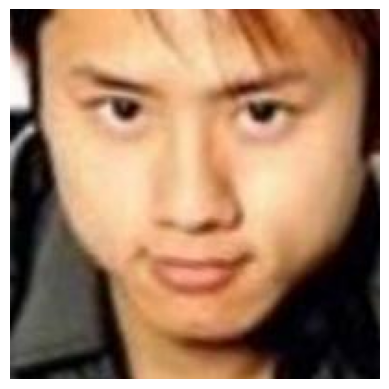

In [3]:
import matplotlib.pyplot as plt
import cv2
import os


image_dir = "/kaggle/input/utkface-new/UTKFace"  
image_files = os.listdir(image_dir)


sample_image = os.path.join(image_dir, image_files[0])
image = cv2.imread(sample_image)

if image is None:
    print(f"❌ Image could not be read: {sample_image}")
else:
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
 
    plt.imshow(image)
    plt.axis("off")
    plt.show()


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten, Input
from sklearn.model_selection import train_test_split

path = "/kaggle/input/utkface-new/UTKFace"
images = []
age = []

for img in os.listdir(path):
    ages = img.split("_")[0]
    
    img = cv2.imread(str(path) + "/" + str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128, 128)) 
    images.append(np.array(img))
    age.append(np.array(ages))
    

images = np.array(images,dtype="uint8") 
images = images.astype("float32")  / 255.0

age = np.array(age, dtype=np.int64)


x_train_age, x_test_age, y_train_age, y_test_age = train_test_split(images, age, random_state=42)




# Define age model and train.

age_model = Sequential()
age_model.add(Conv2D(128, kernel_size=3, activation='relu', input_shape=(128, 128, 3)))
# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
# age_model.add(Conv2D(128, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
# age_model.add(Conv2D(256, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
# age_model.add(Conv2D(512, kernel_size=3, activation='relu'))
age_model.add(MaxPool2D(pool_size=3, strides=2))

age_model.add(Flatten())
age_model.add(Dropout(0.2))
age_model.add(Dense(512, activation='relu'))

age_model.add(Dense(1, activation='linear', name='age'))

age_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
print(age_model.summary())

history_age = age_model.fit(x_train_age, y_train_age,
                            validation_data=(x_test_age, y_test_age), epochs=50, batch_size=32)

age_model.save('age_model_50epochs.h5')


2025-07-06 09:35:59.889815: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751794560.132586      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751794560.200543      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1751794723.690039      19 gpu_device.cc:2022] Created device /job:localhost/repl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ age (Dense)                          │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,181,121 (31.21 MB)

 Trainable params: 8,181,121 (31.21 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50


I0000 00:00:1751794736.610444      65 service.cc:148] XLA service 0x7e27ac070180 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1751794736.611166      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1751794736.611211      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1751794736.955350      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/556 ━━━━━━━━━━━━━━━━━━━━ 28s 51ms/step - loss: 1153.2749 - mae: 29.5868

I0000 00:00:1751794742.604485      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


556/556 ━━━━━━━━━━━━━━━━━━━━ 49s 72ms/step - loss: 459.7047 - mae: 16.5169 - val_loss: 337.4458 - val_mae: 13.3399
Epoch 2/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 31s 55ms/step - loss: 246.9195 - mae: 11.9592 - val_loss: 194.5944 - val_mae: 9.9447
Epoch 3/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - loss: 174.8455 - mae: 9.9939 - val_loss: 149.8545 - val_mae: 8.7261
Epoch 4/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 151.0951 - mae: 9.1479 - val_loss: 115.2274 - val_mae: 7.8175
Epoch 5/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - loss: 110.7100 - mae: 7.8033 - val_loss: 134.5493 - val_mae: 8.7351
Epoch 6/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - loss: 102.4387 - mae: 7.4665 - val_loss: 103.6058 - val_mae: 7.3599
Epoch 7/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 58ms/step - loss: 92.0653 - mae: 7.1276 - val_loss: 98.3352 - val_mae: 7.0489
Epoch 8/50
556/556 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - loss: 79.7008 - mae: 6.5996 - val_loss: 88.2632 - val_mae: 6.7773
Epoch 9/50
556/556 ━

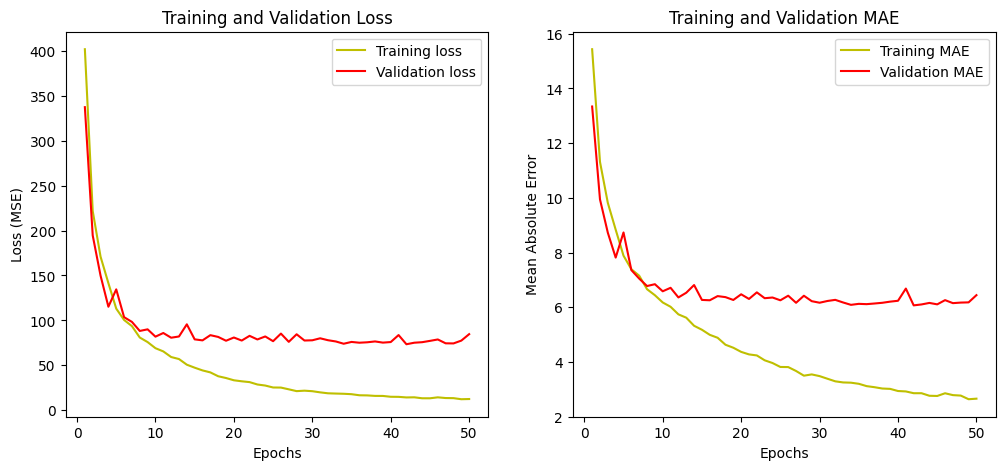

In [5]:
import matplotlib.pyplot as plt


history = history_age  

loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()

# MAE (Mean Absolute Error) 
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'y', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.show()

186/186 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step
Mean Absolute Error(MAE): 6.44
Mean Squared Error (MSE): 84.69


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


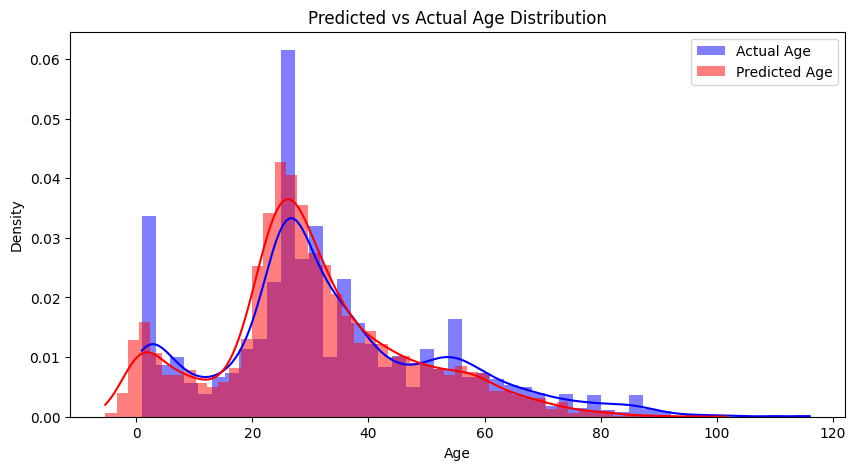

In [6]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred_age = age_model.predict(x_test_age).flatten()
mae = mean_absolute_error(y_test_age, y_pred_age)
mse = mean_squared_error(y_test_age, y_pred_age)

print(f"Mean Absolute Error(MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")

import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(y_test_age, color='blue', label='Actual Age', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred_age, color='red', label='Predicted Age', kde=True, stat="density", linewidth=0)
plt.title("Predicted vs Actual Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

In [7]:
print(age_model.summary())

print("MAE:", mean_absolute_error(y_test_age, y_pred_age))
print("MSE:", mean_squared_error(y_test_age, y_pred_age))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,554,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ age (Dense)                          │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,543,365 (93.63 MB)

 Trainable params: 8,181,121 (31.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,362,244 (62.42 MB)

None
MAE: 6.443543953860974
MSE: 84.69029171228226


In [8]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test_age, y_pred_age)
print("R² Score:", r2)


R² Score: 0.78492649839966


In [9]:
tolerance = 5
accurate_preds = np.abs(y_pred_age - y_test_age) <= tolerance
accuracy_within_range = np.mean(accurate_preds) * 100
print(f"Accuracy within ±{tolerance} years: {accuracy_within_range:.2f}%")


Accuracy within ±5 years: 54.61%


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


y_pred_age = age_model.predict(x_test_age).flatten()
mae = mean_absolute_error(y_test_age, y_pred_age)
mse = mean_squared_error(y_test_age, y_pred_age)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
Mean Absolute Error (MAE): 6.44
Mean Squared Error (MSE): 84.69


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd


y_pred_age = age_model.predict(x_test_age).flatten()
y_train_pred_age = age_model.predict(x_train_age).flatten()

# MAE ve MSE 
train_mae = mean_absolute_error(y_train_age, y_train_pred_age)
val_mae = mean_absolute_error(y_test_age, y_pred_age)

train_mse = mean_squared_error(y_train_age, y_train_pred_age)
val_mse = mean_squared_error(y_test_age, y_pred_age)


metrics_df = pd.DataFrame({
    "Metric": ["Mean Absolute Error (MAE)", "Mean Squared Error (MSE)"],
    "Training": [f"{train_mae:.2f}", f"{train_mse:.2f}"],
    "Validation": [f"{val_mae:.2f}", f"{val_mse:.2f}"]
})

print(metrics_df.to_string(index=False))


186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
556/556 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step
                   Metric Training Validation
Mean Absolute Error (MAE)     3.34       6.44
 Mean Squared Error (MSE)    19.99      84.69
